In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from inflation.dataset.reader import InflationJSONA101DatasetReader, InflationDataset

In [2]:
# Read dataset from json.gz

reader = InflationJSONA101DatasetReader()
dataset = reader.read("../../a101.all.json.gz")
# dataset = reader.read("../../a101.med.json.gz")

2022-01-21 14:44:59 [INFO] inflation.dataset.reader: total_pages=14533, item_pages=5543


In [3]:
# Save dataset

dataset.save_dataset('A101_full_data.pickle')

In [44]:
# Read dataset

dt = InflationDataset.read_dataset('../../inflation-resources/data/a101_full_data.pickle')

type(dt)
# Convert dataset to data frame

df = InflationDataset.to_df(dt)

In [45]:
df.head()

,product_name,product_url,product_code,product_brand,price,currency,in_stock,sample_date
0,Ahşap Ramazan Davulu,https://www.a101.com.tr/anne-bebek/ahsap-ramaz...,26017745,,49.95,TRY,True,2021-11-30 00:31:22
1,Barbie Twistable Scooter 3 Tekerlekli,https://www.a101.com.tr/anne-bebek/barbie-twis...,26018419,,129.95,TRY,True,2021-12-04 15:51:21
2,Bebek Alt Üst Takım Beyaz,https://www.a101.com.tr/anne-bebek/bebek-alt-u...,26014709004,,19.95,TRY,True,2021-12-06 08:30:06
3,Berber Oyun Hamuru Seti,https://www.a101.com.tr/anne-bebek/berber-oyun...,26016222,,24.95,TRY,False,2021-12-08 07:13:18
4,Canbebe Islak Havlu 3x56 cm Adet,https://www.a101.com.tr/anne-bebek/canbebe-isl...,23000698,Canbebe,16.75,TRY,False,2021-12-07 09:04:26


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   product_name   5543 non-null   object        
 1   product_url    5543 non-null   object        
 2   product_code   5543 non-null   object        
 3   product_brand  5543 non-null   object        
 4   price          5543 non-null   float64       
 5   currency       5543 non-null   object        
 6   in_stock       5543 non-null   bool          
 7   sample_date    5543 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(1), object(5)
memory usage: 308.7+ KB


In [7]:
df.describe()

,price
count,5543.000000
mean,245.183675
std,839.561598
min,0.500000
25%,9.950000
50%,24.900000
75%,99.900000
max,14699.000000


In [8]:
# df.shape()
# TypeError: 'tuple' object is not callable  # Q: niyeyse patliyor?

In [47]:
# How many items are in stock?
print(f"{len(df[df['in_stock'] == True])} items in stocks in total of {len(df)} items.",
      f"{round(len(df[df['in_stock'] == True]) / len(df), 4) * 100}% of products in the stock.", sep='\n')

3391 items in stocks in total of 5543 items.
61.18% of products in the stock.


In [138]:
# Create new date column (We don't need the hour part of the date object)
# Also drop original date column
df['date'] = df['sample_date'].apply(lambda x: pd.Timestamp.strftime(x, '%d-%m-%Y'))
df.head()

,product_name,product_url,product_code,product_brand,price,currency,in_stock,sample_date,date
0,Ahşap Ramazan Davulu,https://www.a101.com.tr/anne-bebek/ahsap-ramaz...,26017745,,49.95,TRY,True,2021-11-30 00:31:22,30-11-2021
1,Barbie Twistable Scooter 3 Tekerlekli,https://www.a101.com.tr/anne-bebek/barbie-twis...,26018419,,129.95,TRY,True,2021-12-04 15:51:21,04-12-2021
2,Bebek Alt Üst Takım Beyaz,https://www.a101.com.tr/anne-bebek/bebek-alt-u...,26014709004,,19.95,TRY,True,2021-12-06 08:30:06,06-12-2021
3,Berber Oyun Hamuru Seti,https://www.a101.com.tr/anne-bebek/berber-oyun...,26016222,,24.95,TRY,False,2021-12-08 07:13:18,08-12-2021
4,Canbebe Islak Havlu 3x56 cm Adet,https://www.a101.com.tr/anne-bebek/canbebe-isl...,23000698,Canbebe,16.75,TRY,False,2021-12-07 09:04:26,07-12-2021


In [139]:
# Subset: only takes items that are in stocks

df_in_stock = df[df['in_stock'] == True]
len(df_in_stock)

3391

In [140]:
# Drop original date column
df_in_stock = df_in_stock.drop(columns=['sample_date'])
df_in_stock.head()

,product_name,product_url,product_code,product_brand,price,currency,in_stock,date
0,Ahşap Ramazan Davulu,https://www.a101.com.tr/anne-bebek/ahsap-ramaz...,26017745,,49.95,TRY,True,30-11-2021
1,Barbie Twistable Scooter 3 Tekerlekli,https://www.a101.com.tr/anne-bebek/barbie-twis...,26018419,,129.95,TRY,True,04-12-2021
2,Bebek Alt Üst Takım Beyaz,https://www.a101.com.tr/anne-bebek/bebek-alt-u...,26014709004,,19.95,TRY,True,06-12-2021
5,Dinozor Ailesi Puzzle Pembe,https://www.a101.com.tr/anne-bebek/dinozor-ail...,26020523001,,9.95,TRY,True,03-12-2021
6,Dinozor Ailesi Puzzle Yeşil,https://www.a101.com.tr/anne-bebek/dinozor-ail...,26020523002,,9.95,TRY,True,30-11-2021


In [141]:
# Sort by name and date
df_in_stock = df_in_stock.sort_values('product_name')
df_in_stock.head()

,product_name,product_url,product_code,product_brand,price,currency,in_stock,date
1331,0-3 Yaş İlk Kitaplarım Serisi Hayvanlar - 12 K...,https://www.a101.com.tr/kitap-kirtasiye/0-3-ya...,26006372,,83.90,TRY,True,25-10-2021
1822,1 More Ecs-3001 Earbuds Kulaklık,https://www.a101.com.tr/elektronik/1-more-ecs-...,25002341,Xiaomi,179.95,TRY,True,21-09-2021
2939,1. Sınıf Okula Başlangıç Okuma Ve Matematik Seti,https://www.a101.com.tr/kitap-kirtasiye/1-sini...,26012892,,55.90,TRY,True,18-09-2021
4423,1. Sınıflar İçin Pratik Matematik Serisi - 6 K...,https://www.a101.com.tr/kitap-kirtasiye/1-sini...,26012921,,34.90,TRY,True,28-07-2021
1332,"10X15 Cm 100 Yaprak Not Defteri Çizgili, Sarı",https://www.a101.com.tr/kitap-kirtasiye/10x15-...,26015118007,,2.75,TRY,True,27-10-2021


In [67]:
# Number of unique product # nasil bu kadar az olur ya?
df_in_stock['product_name'].nunique()

3172

In [126]:
# date range
df_in_stock['date'] = pd.to_datetime(df_in_stock['date'], format='%d-%m-%Y')
# df_in_stock.date.min(), df_in_stock.date.max() # duzgun calismiyor
#df.sample_date.min(), df.sample_date.max()

In [128]:
# Number of different days
len(df_in_stock['date'].value_counts())

43

In [129]:
# day's frequecies
df_in_stock['date'].value_counts()

2021-09-18    337
2021-09-25    283
2021-09-28    235
2021-09-27    195
2021-09-20    161
2021-09-24    161
2021-05-08    117
2021-10-17    111
2021-05-14    110
2021-09-17    106
2021-10-26     99
2021-10-22     99
2021-11-30     96
2021-04-20     94
2021-10-27     94
2021-12-03     92
2021-09-21     89
2021-12-08     87
2021-12-04     80
2021-09-23     73
2021-05-11     73
2021-07-31     60
2021-10-25     60
2021-10-20     52
2021-06-17     49
2021-12-06     41
2021-04-19     41
2021-12-09     38
2021-06-25     35
2021-07-28     32
2021-11-29     30
2021-09-19     27
2021-07-30     23
2021-11-27     21
2021-04-15     21
2021-12-07     14
2021-10-28     10
2021-10-23     10
2021-10-24      9
2021-06-15      9
2021-08-01      7
2021-06-24      5
2021-05-13      5
Name: date, dtype: int64

<AxesSubplot:xlabel='count', ylabel='date'>

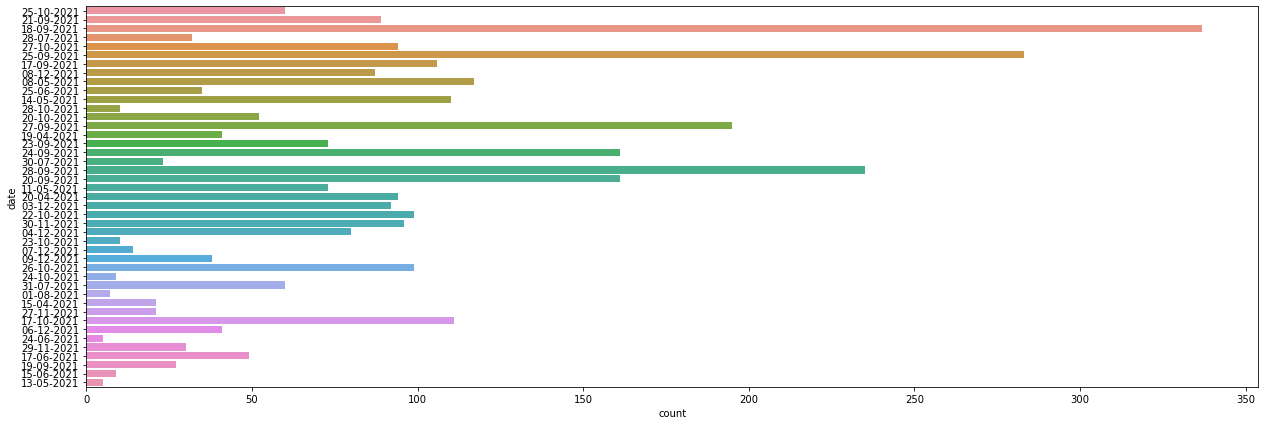

In [142]:
plt.figure(figsize=(21,7))
sns.countplot(y="date", data=df_in_stock)

In [131]:
# monthly data frequencies

# derive monthly data

df_in_stock['month'] = df_in_stock['date'].apply(lambda x: pd.Timestamp.strftime(x, '%m'))

<AxesSubplot:xlabel='count', ylabel='month'>

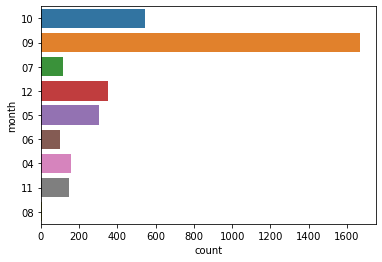

In [136]:
sns.countplot(y="month", data=df_in_stock)